In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai4eng-20242

udea-ai4eng-20242.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip udea*.zip > /dev/null

replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace submission_example.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  50135751 test.csv
   692501  10666231 118025055 train.csv
  1286075  15528571 172877479 total


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from rlxutils import subplots
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 12)


In [ ]:
z.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
z.columns

Index(['ID', 'PERIODO', 'ESTU_PRGM_ACADEMICO', 'ESTU_PRGM_DEPARTAMENTO',
       'ESTU_VALORMATRICULAUNIVERSIDAD', 'ESTU_HORASSEMANATRABAJA',
       'FAMI_ESTRATOVIVIENDA', 'FAMI_TIENEINTERNET', 'FAMI_EDUCACIONPADRE',
       'FAMI_EDUCACIONMADRE', 'ESTU_PAGOMATRICULAPROPIO',
       'RENDIMIENTO_GLOBAL'],
      dtype='object')

In [ ]:
z.dtypes

,0
ID,int64
PERIODO,int64
ESTU_PRGM_ACADEMICO,object
ESTU_PRGM_DEPARTAMENTO,object
ESTU_VALORMATRICULAUNIVERSIDAD,object
ESTU_HORASSEMANATRABAJA,object
FAMI_ESTRATOVIVIENDA,object
FAMI_TIENEINTERNET,object
FAMI_EDUCACIONPADRE,object
FAMI_EDUCACIONMADRE,object


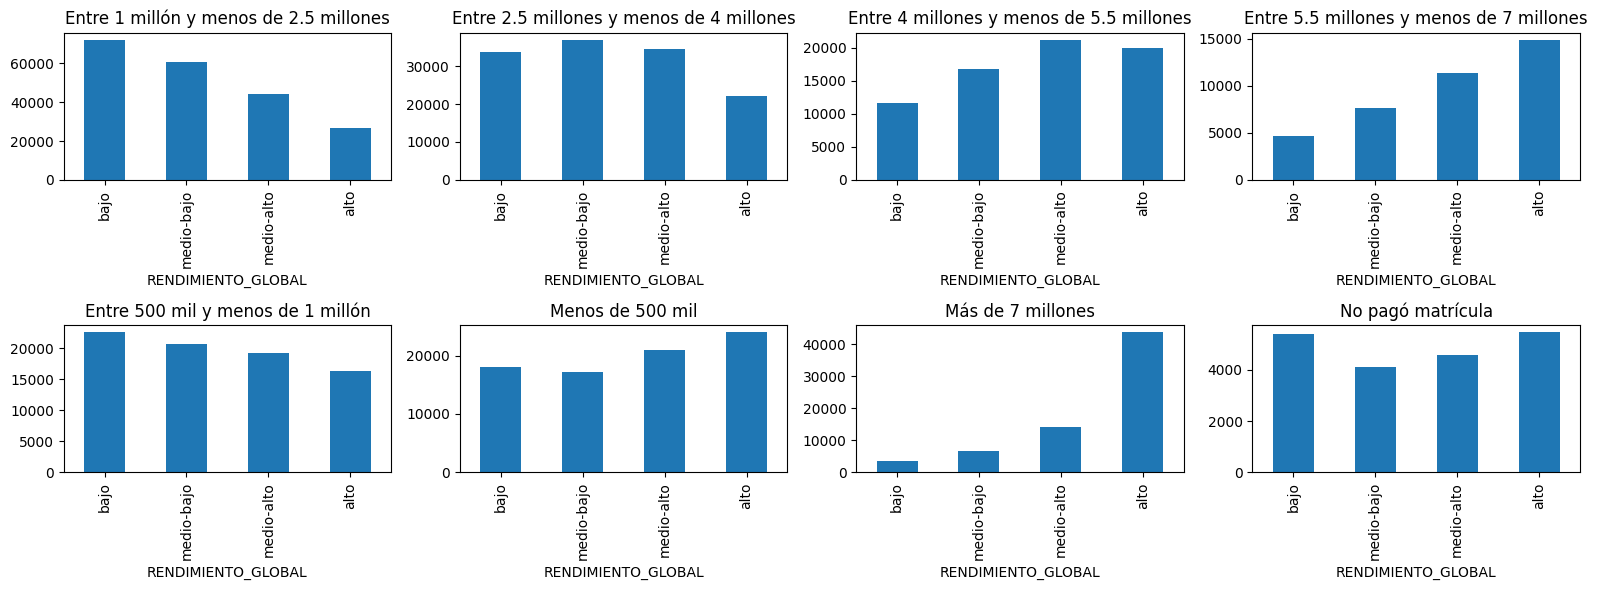

In [ ]:
c = sorted(z.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts().index)
for ax,ci in subplots(c, n_cols=4, usizex=4):
    zc = z[z.ESTU_VALORMATRICULAUNIVERSIDAD==ci]
    zc.RENDIMIENTO_GLOBAL.value_counts()[['bajo', 'medio-bajo', 'medio-alto', 'alto']].plot(kind='bar')
    plt.title(ci)

In [ ]:
fre_horas_trab = z['ESTU_HORASSEMANATRABAJA'].value_counts()

In [ ]:
orden = ['0', 'Menos de 10 horas', 'Entre 11 y 20 horas', 'Entre 21 y 30 horas', 'Más de 30 horas']
fre_horas_trab = fre_horas_trab.reindex(orden)

<Axes: xlabel='ESTU_HORASSEMANATRABAJA'>

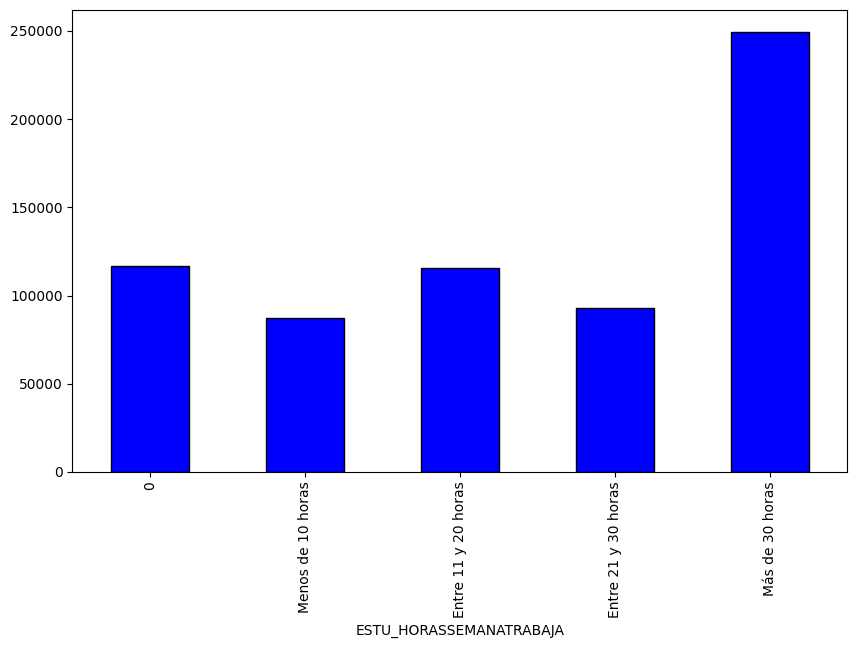

In [ ]:
plt.figure(figsize=(10, 6))
fre_horas_trab.plot(kind='bar', color='blue', edgecolor='black')

In [ ]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   ID                              692500 non-null  int64 
 1   PERIODO                         692500 non-null  int64 
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object
 7   FAMI_TIENEINTERNET              665871 non-null  object
 8   FAMI_EDUCACIONPADRE             669322 non-null  object
 9   FAMI_EDUCACIONMADRE             668836 non-null  object
 10  ESTU_PAGOMATRICULAPROPIO        686002 non-null  object
 11  RENDIMIENTO_GLOBAL              692500 non-null  object
dtypes: int64(2), object(10)
memory

## Cargamos el dataset train

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_EDUCACIONMADRE,ESTU_PAGOMATRICULAPROPIO,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Postgrado,No,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Técnica o tecnológica incompleta,No,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Secundaria (Bachillerato) completa,No,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Secundaria (Bachillerato) completa,No,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Primaria completa,No,medio-bajo


In [ ]:
train.shape

(692500, 12)

In [ ]:
train.ESTU_PAGOMATRICULAPROPIO.value_counts()

,count
ESTU_PAGOMATRICULAPROPIO,
No,382201
Si,303801


### Convertimos los datos de valor de matrícula a Categórica ordinal

In [ ]:
train.ESTU_VALORMATRICULAUNIVERSIDAD.value_counts()

,count
ESTU_VALORMATRICULAUNIVERSIDAD,
Entre 1 millón y menos de 2.5 millones,204048
Entre 2.5 millones y menos de 4 millones,127430
Menos de 500 mil,80263
Entre 500 mil y menos de 1 millón,78704
Entre 4 millones y menos de 5.5 millones,69736
Más de 7 millones,68014
Entre 5.5 millones y menos de 7 millones,38490
No pagó matrícula,19528


In [ ]:
train['ESTU_VALORMATRICULAUNIVERSIDAD'] = pd.Categorical(train['ESTU_VALORMATRICULAUNIVERSIDAD'],
                                                         categories=['No pagó matrícula',
                                                                     'Menos de 500 mil',
                                                                     'Entre 500 mil y menos de 1 millón',
                                                                     'Entre 1 millón y menos de 2.5 millones',
                                                                     'Entre 2.5 millones y menos de 4 millones',
                                                                     'Entre 4 millones y menos de 5.5 millones',
                                                                     'Entre 5.5 millones y menos de 7 millones',
                                                                     'Más de 7 millones'
                                                                     ], ordered=True)

In [ ]:
print(train['ESTU_VALORMATRICULAUNIVERSIDAD'].dtype)
print(train['ESTU_VALORMATRICULAUNIVERSIDAD'].cat.categories)

category
Index(['No pagó matrícula', 'Menos de 500 mil',
       'Entre 500 mil y menos de 1 millón',
       'Entre 1 millón y menos de 2.5 millones',
       'Entre 2.5 millones y menos de 4 millones',
       'Entre 4 millones y menos de 5.5 millones',
       'Entre 5.5 millones y menos de 7 millones', 'Más de 7 millones'],
      dtype='object')


In [ ]:
train['ESTU_PRGM_ACADEMICO'].value_counts()

,count
ESTU_PRGM_ACADEMICO,
DERECHO,53244
ADMINISTRACION DE EMPRESAS,51902
CONTADURIA PUBLICA,39664
PSICOLOGIA,31932
INGENIERIA INDUSTRIAL,28481
...,...
LICENCIATURA EN ESPAÑOL Y FILOLOGÍA,1
ADMINISTRACION EN NEGOCIOS INTERNACIONALES,1
ADMINISTRACION DE COMERCIO EXTERIOR,1


Podemos observar que hay demasiadas carreras diferentes. Por lo cuál nos surge la inquietud de si depronto existe cateforías repetidas o realmente existen esa cantidad de carreras

In [ ]:
carreras = []
for i in range(len(train['ESTU_PRGM_ACADEMICO'])):
  carreras.append(train['ESTU_PRGM_ACADEMICO'][i])
print (np.unique(carreras))

['3°  CICLO PROFESIONAL NEGOCIOS INTERNACIONALES'
 'ACTIVIDAD FISICA Y DEPORTE' 'ACUICULTURA' 'ADMINISTRACION'
 'ADMINISTRACION  FINANCIERA' 'ADMINISTRACION & SERVICIO'
 'ADMINISTRACION AERONAUTICA' 'ADMINISTRACION AGROPECUARIA'
 'ADMINISTRACION AMBIENTAL'
 'ADMINISTRACION AMBIENTAL Y DE LOS RECURSOS NATURALES'
 'ADMINISTRACION BANCARIA Y FINANCIERA' 'ADMINISTRACION COMERCIAL'
 'ADMINISTRACION COMERCIAL Y DE MERCADEO'
 'ADMINISTRACION DE COMERCIO EXTERIOR' 'ADMINISTRACION DE EMPRESAS'
 'ADMINISTRACION DE EMPRESAS  Y  GESTION AMBIENTAL'
 'ADMINISTRACION DE EMPRESAS AGROINDUSTRIALES'
 'ADMINISTRACION DE EMPRESAS AGROPECUARIAS'
 'ADMINISTRACION DE EMPRESAS COMERCIALES'
 'ADMINISTRACION DE EMPRESAS EN TELECOMUNICACIONES'
 'ADMINISTRACION DE EMPRESAS TURISTICA'
 'ADMINISTRACION DE EMPRESAS TURISTICAS'
 'ADMINISTRACION DE EMPRESAS TURISTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS TURÍSTICAS Y HOTELERAS'
 'ADMINISTRACION DE EMPRESAS Y FINANZAS'
 'ADMINISTRACION DE GESTISN HUMANA'
 'ADMINIS

En esta etapa de exploración de datos nos damos cuenta que aparecen registros que se refieren a lo mismo, pero debido a diferencias mínimas, como el uso de tildes o espacios, se interpretan como si fueran categorías diferentes. Como por ejemplo con nombres de las carreras: **"TEOLOGIA" y "TEOLOGÍA"** son lo mismo, pero el sistema puede tratarlas como dos cosas distintas. Estas inconsistencias no solo puede afectar el análisis, sino también confundir a los modelos de IA que entrenaremos en un futuro. Por eso es fundamental limpiar y normalizar los datos.

In [41]:
train['FAMI_ESTRATOVIVIENDA'] = pd.Categorical(train['FAMI_ESTRATOVIVIENDA'],
                                                         categories=['Estrato 1',
                                                                     'Estrato 2',
                                                                     'Estrato 3',
                                                                     'Estrato 4',
                                                                     'Estrato 5',
                                                                     'Estrato 6',
                                                                     'Sin Estrato'], ordered=True)

In [42]:
train['FAMI_ESTRATOVIVIENDA'].value_counts()

,count
FAMI_ESTRATOVIVIENDA,
Estrato 2,232671
Estrato 3,210685
Estrato 1,111991
Estrato 4,65514
Estrato 5,23608
Estrato 6,12605
Sin Estrato,3289


In [49]:
train['FAMI_ESTRATOVIVIENDA']

,FAMI_ESTRATOVIVIENDA
0,Estrato 3
1,Estrato 3
2,Estrato 3
3,Estrato 4
4,Estrato 3
...,...
692495,Estrato 2
692496,Estrato 3
692497,Estrato 3
692498,Estrato 1


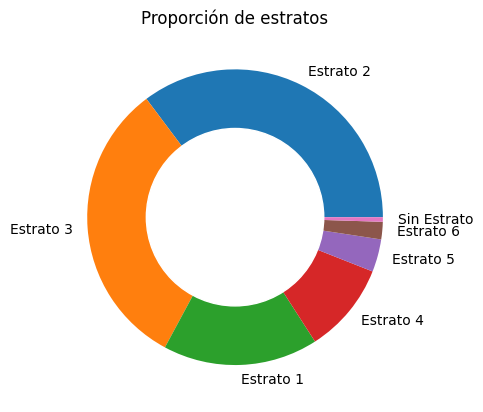

In [62]:
plt.pie(train['FAMI_ESTRATOVIVIENDA'].value_counts(), labels = ['Estrato 2', 'Estrato 3', 'Estrato 1', 'Estrato 4', 'Estrato 5', 'Estrato 6', 'Sin Estrato'])
plt.title('Proporción de estratos')
my_circle=plt.Circle( (0,0), 0.6, color='white')
plt.gca().add_artist(my_circle)
plt.show()

In [63]:
train['ESTU_PRGM_DEPARTAMENTO'].value_counts()

,count
ESTU_PRGM_DEPARTAMENTO,
BOGOTÁ,282159
ANTIOQUIA,83607
VALLE,44588
ATLANTICO,41020
SANTANDER,28828
NORTE SANTANDER,22588
BOLIVAR,20629
BOYACA,14048
CUNDINAMARCA,14018
